Analise de dados financeiros 

In [1]:
# Importar as bibliotecas necessárias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from fpdf import FPDF


In [2]:
# Função para coletar dados históricos de ações
def coletar_dados(ticker, inicio, fim):
    try:
        dados = yf.download(ticker, start=inicio, end=fim)
        return dados
    except Exception as e:
        print(f"Erro ao coletar dados: {e}")
        return pd.DataFrame()

# Função para criar um relatório PDF
def gerar_relatorio(dados, titulo, nome_arquivo):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=titulo, ln=True, align='C')
    for linha in dados.itertuples():
        pdf.cell(200, 10, txt=f"Data: {linha.Index}, Preço de Fechamento: {linha.Close:.2f}", ln=True)
    pdf.output(nome_arquivo)
    print(f"Relatório salvo como {nome_arquivo}")


In [3]:
# Entrada do usuário
ticker = input("Digite o ticker da ação: ").upper().strip()
inicio = "2020-01-01"
fim = "2023-01-01"

if not ticker:
    print("O ticker não pode estar vazio. Tente novamente.")
else:
    # Coletar dados
    dados_acao = coletar_dados(ticker, inicio, fim)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Verificar se os dados foram coletados corretamente
if dados_acao.empty:
    print(f"Não foi possível coletar dados para o ticker '{ticker}'. Verifique o código.")
else:
    # Calcular Média Móvel de 50 dias
    dados_acao['50_MA'] = dados_acao['Close'].rolling(window=50).mean()


In [5]:
# Gerar relatório em PDF
gerar_relatorio(dados_acao.head(), f"Relatório Financeiro de {ticker}", "relatorio.pdf")


Relatório salvo como relatorio.pdf


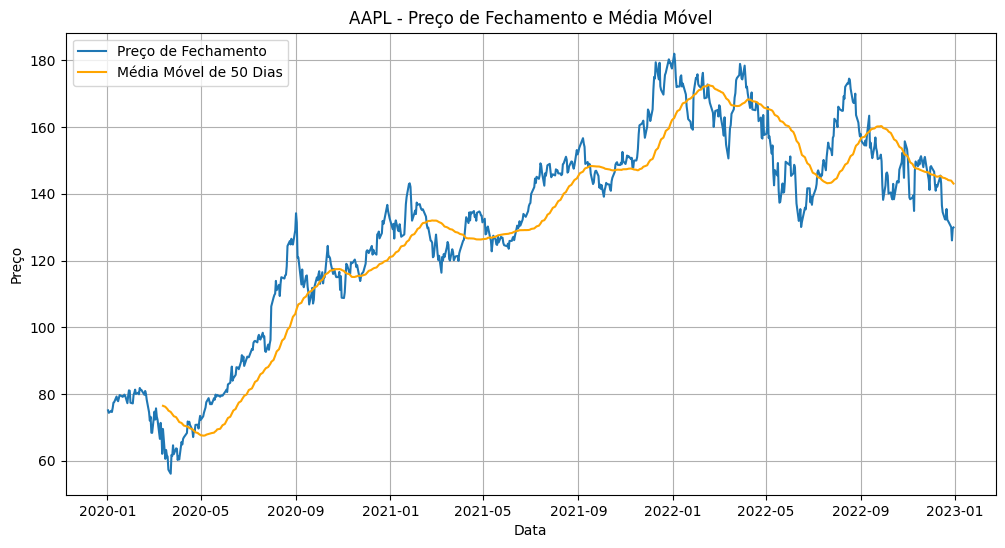

In [6]:
# Gráfico com Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(dados_acao['Close'], label='Preço de Fechamento')
plt.plot(dados_acao['50_MA'], label='Média Móvel de 50 Dias', color='orange')
plt.title(f'{ticker} - Preço de Fechamento e Média Móvel')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
 # Gráfico Interativo com Plotly
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.2)
fig.add_trace(go.Scatter(x=dados_acao.index, y=dados_acao['Close'], name='Preço de Fechamento'), row=1, col=1)
fig.add_trace(go.Scatter(x=dados_acao.index, y=dados_acao['50_MA'], name='Média Móvel de 50 Dias'), row=2, col=1)
fig.update_layout(height=600, width=800, title_text=f"Análise de {ticker}")
fig.show()
